# Taller # 3

In [1]:
# Librerías estándar
import os
import glob

# Procesamiento de imágenes
import cv2
import numpy as np

# Visualización
import matplotlib.pyplot as plt

# Scikit-learn: modelos y métricas
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix as cm, ConfusionMatrixDisplay as CMD

# TensorFlow / Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


In [2]:
def cargar_datos_desde_directorio(carpeta_raiz, dimensiones=(64, 64)):
    imagenes = []
    etiquetas = []
    subcarpetas = sorted([nombre for nombre in os.listdir(carpeta_raiz) if os.path.isdir(os.path.join(carpeta_raiz, nombre))])
    mapa_clases = {nombre_clase: i for i, nombre_clase in enumerate(subcarpetas)}
    print("Se detectaron las siguientes clases:", mapa_clases)

    for nombre_clase in subcarpetas:
        ruta_imagenes = os.path.join(carpeta_raiz, nombre_clase)
        lista_archivos = glob.glob(os.path.join(ruta_imagenes, "*"))
        print(f"Cargando {len(lista_archivos)} archivos de la clase \"{nombre_clase}\"")

        for ruta_img in lista_archivos:
            imagen = cv2.imread(ruta_img)
            if imagen is not None:
                imagen_redimensionada = cv2.resize(imagen, dimensiones)
                imagenes.append(imagen_redimensionada)
                etiquetas.append(mapa_clases[nombre_clase])
            else:
                print(f"[Aviso] Imagen no válida: {ruta_img}")

    print(f"Total de imágenes procesadas: {len(imagenes)}")
    return np.array(imagenes, dtype=np.float32) / 255.0, np.array(etiquetas), mapa_clases


In [3]:
X, y, clase_dict = cargar_datos_desde_directorio("./insumos/train")

Se detectaron las siguientes clases: {'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11, 'cat': 12, 'cow': 13, 'dog': 14, 'horse': 15}
Cargando 263 archivos de la clase "Black-grass"
Cargando 390 archivos de la clase "Charlock"
Cargando 287 archivos de la clase "Cleavers"
Cargando 611 archivos de la clase "Common Chickweed"
Cargando 221 archivos de la clase "Common wheat"
Cargando 475 archivos de la clase "Fat Hen"
Cargando 654 archivos de la clase "Loose Silky-bent"
Cargando 221 archivos de la clase "Maize"
Cargando 516 archivos de la clase "Scentless Mayweed"
Cargando 231 archivos de la clase "Shepherds Purse"
Cargando 496 archivos de la clase "Small-flowered Cranesbill"
Cargando 385 archivos de la clase "Sugar beet"
Cargando 164 archivos de la clase "cat"
Cargando 164 archivos de la clase "cow"
Cargan

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_flat = X_train.reshape(len(X_train), -1)
X_val_flat = X_val.reshape(len(X_val), -1)


In [5]:
modelo_logistico = LogisticRegression(max_iter=1000)
modelo_logistico.fit(X_train_flat, y_train)

predicciones_lr = modelo_logistico.predict(X_val_flat)
precision_lr = accuracy_score(y_val, predicciones_lr)

print(f"Precisión del modelo de regresión logística: {precision_lr:.4f}")


Precisión del modelo de regresión logística: 0.4464


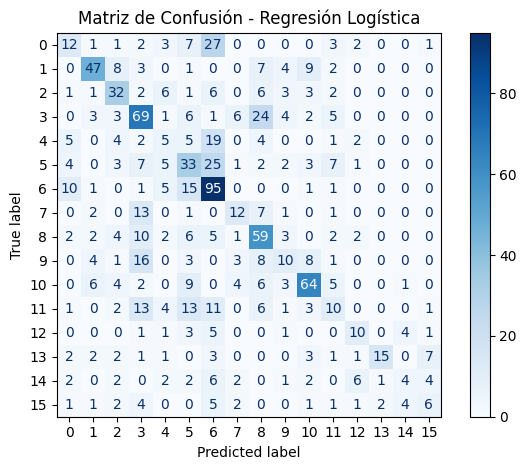

In [ ]:
pred_lr = modelo_logistico.predict(X_val_flat)

matriz_confusion_lr = cm(y_val, pred_lr)
CMD(matriz_confusion_lr).plot(cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística", fontsize=12)
plt.tight_layout()
plt.show()


In [10]:
# Codificación one-hot para las etiquetas
etiquetas_entrenamiento_cat = to_categorical(y_train, num_classes=len(clase_dict))
etiquetas_validacion_cat = to_categorical(y_val, num_classes=len(clase_dict))

# Definición del modelo CNN
modelo_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(clase_dict), activation='softmax')
])

# Compilación del modelo
modelo_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento del modelo
modelo_cnn.fit(
    X_train,
    etiquetas_entrenamiento_cat,
    epochs=10,
    validation_data=(X_val, etiquetas_validacion_cat)
)


Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.1816 - loss: 2.4852 - val_accuracy: 0.4085 - val_loss: 1.7418
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4773 - loss: 1.5367 - val_accuracy: 0.5795 - val_loss: 1.2253
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6268 - loss: 1.1079 - val_accuracy: 0.6192 - val_loss: 1.0626
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6901 - loss: 0.9124 - val_accuracy: 0.6645 - val_loss: 1.0704
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7609 - loss: 0.7755 - val_accuracy: 0.6691 - val_loss: 0.9184
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8133 - loss: 0.5841 - val_accuracy: 0.7200 - val_loss: 0.8355
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8515 - loss: 0.4863 - val_accuracy: 0.7394 - val_loss: 0.8055
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8802 - loss: 0.3911 - val_accu

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


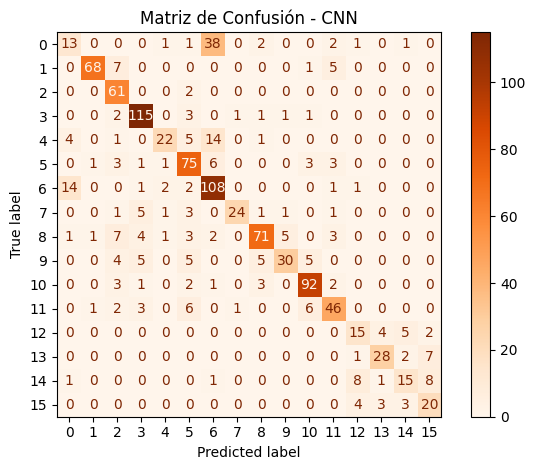

In [11]:
# Predicción del modelo CNN
predicciones_cnn_prob = modelo_cnn.predict(X_val)
predicciones_cnn = np.argmax(predicciones_cnn_prob, axis=1)

# Matriz de confusión
matriz_confusion_cnn = cm(y_val, predicciones_cnn)
CMD(matriz_confusion_cnn).plot(cmap='Oranges')

plt.title("Matriz de Confusión - CNN", fontsize=12)
plt.tight_layout()
plt.show()


In [17]:
def cargar_datos_test(ruta_test, dimensiones=(64, 64)):
    imagenes_test = []
    nombres_archivos = []
    lista_archivos = sorted(glob.glob(os.path.join(ruta_test, "*")))

    print(f"Cantidad de imágenes encontradas en el conjunto de prueba: {len(lista_archivos)}")

    for ruta in lista_archivos:
        imagen = cv2.imread(ruta)
        if imagen is not None:
            imagen_redimensionada = cv2.resize(imagen, dimensiones)
            imagenes_test.append(imagen_redimensionada)
            nombres_archivos.append(os.path.basename(ruta))
        else:
            print(f"[Aviso] No se pudo procesar la imagen: {ruta}")

    imagenes_test = np.array(imagenes_test, dtype=np.float32) / 255.0
    return imagenes_test, nombres_archivos


In [13]:
X_test, test_names = cargar_datos_test("./Insumos/test")

Cantidad de imágenes encontradas en el conjunto de prueba: 962


In [24]:
# Aplanar imágenes para regresión logística
X_test_flat = X_test.reshape(len(X_test), -1)

# Predicciones con regresión logística
y_test_pred_lr = modelo_logistico.predict(X_test_flat)

# Diccionario inverso para mapear índice a nombre de clase
indice_a_clase = {v: k for k, v in clase_dict.items()}

# Etiquetas predichas en texto
labels_lr = [indice_a_clase[i] for i in y_test_pred_lr]

# Exportar resultados a CSV
import pandas as pd

df_lr = pd.DataFrame({
    "file": test_names,
    "label": labels_lr
})

df_lr.to_csv("./output/predicciones_logistica.csv", index=False)
print("Archivo CSV generado correctamente.")


Archivo CSV generado correctamente.


In [25]:
# Predicción con el modelo CNN
predicciones_test_cnn_prob = modelo_cnn.predict(X_test)
predicciones_test_cnn = np.argmax(predicciones_test_cnn_prob, axis=1)

# Mapeo índice a clase
indice_a_clase = {v: k for k, v in clase_dict.items()}

# Etiquetas en texto para CNN
labels_cnn = [indice_a_clase[i] for i in predicciones_test_cnn]

# Exportar CSV con resultados de la CNN
import pandas as pd

df_cnn = pd.DataFrame({
    "file": test_names,
    "label": labels_cnn
})

df_cnn.to_csv("./output/predicciones_cnn.csv", index=False)
print("Archivo CSV de predicciones CNN generado correctamente.")


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Archivo CSV de predicciones CNN generado correctamente.


## Comparación de Accuracy

In [23]:
print(f"Precisión del modelo de regresión logística: {accuracy_score(y_val, pred_lr):.4f}")
print(f"Precisión del modelo CNN: {accuracy_score(y_val, predicciones_cnn):.4f}")


Precisión del modelo de regresión logística: 0.4464
Precisión del modelo CNN: 0.7421


La red neuronal convolucional mostró un desempeño significativamente mejor en comparación con el modelo de regresión logística, evidenciado por una mayor precisión en la clasificación.